# Assignment 1: Backpropagation and Multilayer Perceptrons

Your Name: 

Name of the Students You Worked With:

References You Consulted:

Feel free to use the Google Colab environment (https://colab.research.google.com/notebooks/welcome.ipynb) or follow the instructions on the course website (https://hms-dbmi.github.io/BMI_707/resources/) to setup python environment.

## Part 1: Data Exploration (20 points)
In this assignment, we will use a modified dataset from the Pima Indian Diabetes Database (https://www.kaggle.com/uciml/pima-indians-diabetes-database). This dataset is released under the CC0 1.0 Universal (CC0 1.0) Public Domain Dedication (https://creativecommons.org/publicdomain/zero/1.0/).

Below is a brief data description of this dataset from Kaggle (https://www.kaggle.com/uciml/pima-indians-diabetes-database):
"This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage." "The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on."

**Please note that we have modified the dataset a little to simplify the analyses. Please use the code below to read in the modified files.**

In [40]:
# import python packages
import numpy as np              # linear algebra
import pandas as pd             # to process the input files

import matplotlib.pyplot as plt # for plotting
%matplotlib inline


In [41]:
# read in the data files; please use these files, instead of the raw files from the Pima Indian Diabetes Database
train_data = pd.read_csv('https://www.dropbox.com/s/n0jjos6faoyqncp/diabetesTrain.csv?dl=1')
test_data = pd.read_csv('https://www.dropbox.com/s/6uu2754iqv4cxei/diabetesTest.csv?dl=1')

# check the data files
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,99.0,70.0,16.000000,44.000000,20.4,0.235,27,0
1,7,136.0,74.0,26.000000,135.000000,26.0,0.647,51,0
2,1,97.0,70.0,15.000000,153.777049,18.2,0.147,21,0
3,2,90.0,60.0,28.962963,153.777049,23.5,0.191,25,0
4,8,188.0,78.0,28.962963,153.777049,47.9,0.137,43,1


In [42]:
# construct the design matrix for the input features and the outcome vector
features = list(train_data.columns.values)
features.remove('Outcome')
X_train = train_data[features]
y_train = train_data['Outcome']
X_val = test_data[features]
y_val = test_data['Outcome']

### Question 1.1: How many people have outcome "1" (diabetes) in the training set? How many people do not have diabetes in the training set? (5 points)
Hint: The Pandas library has some handy functions for this task.


In [43]:
########## Your code ##########

print("Number of People with Outcome = 1 is "+str(y_train.value_counts()[1]))

Number of People with Outcome = 1 is 219


### Question 1.2: What's the median BMI in the training cohort? What's the median BMI among diabetic and non-diabetic patients in the training and test set, respectively? (5 points)
Hint: Feel free to use the Statistics library in Python



In [44]:
########## Your code ##########
print("Train Data: BMI Median = "+str(train_data['BMI'].median()))
print("Train Data: Non-Diabetic BMI Median = "+str(train_data.loc[train_data['Outcome'] == 0, 'BMI'].median()))
print("Train Data: Diabetic BMI Median = "+str(train_data.loc[train_data['Outcome'] == 1, 'BMI'].median()))

print("Test Data: BMI Median = "+str(test_data['BMI'].median()))
print("Test Data: Non-Diabetic BMI Median = "+str(test_data.loc[test_data['Outcome'] == 0, 'BMI'].median()))
print("Test Data: Diabetic BMI Median = "+str(test_data.loc[test_data['Outcome'] == 1, 'BMI'].median()))


Train Data: BMI Median = 32.349999999999994
Train Data: Non-Diabetic BMI Median = 30.1
Train Data: Diabetic BMI Median = 34.3
Test Data: BMI Median = 32.6633333333333
Test Data: Non-Diabetic BMI Median = 31.6
Test Data: Diabetic BMI Median = 33.9


### Question 1.3: Is BMI associated with diabetes in the training cohort? Why? (5 points)
Hint: Feel free to use any statistical test, but be sure to **mention the assumption(s) of the test you chose**.

Word limit: 100 words.

In [45]:
########## Your answer ##########
# Many possible solutions. Below are two examples.

import numpy as np
import matplotlib.pyplot as plt

# Covariance
x = train_data['BMI']
y = train_data['Outcome']
covariance = np.cov(x, y)
print('Covariance: '+ str(covariance[1,0]))


# Pearson's Correlation
from scipy.stats import pearsonr
corr, p = pearsonr(x, y)
print("Pearson's correlation: %.3f" % corr)
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%f' % p)
else:
 print('Samples are correlated (reject H0) p=%f' % p)
# Spearman's Correlation
from scipy.stats import spearmanr
corr, p = spearmanr(x, y)
print("Spearman's correlation: %f" % corr)
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%f' % p)
else:
 print('Samples are correlated (reject H0) p=%f' % p)

# Kendall's Correlation
from scipy.stats import kendalltau
corr, p = kendalltau(x, y)
print("Kendall's correlation: %f" % corr)
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%f' % p)
else:
 print('Samples are correlated (reject H0) p=%f' % p)


Covariance: 1.1121859975113617
Pearson's correlation: 0.333
Samples are correlated (reject H0) p=0.000000
Spearman's correlation: 0.324910
Samples are correlated (reject H0) p=0.000000
Kendall's correlation: 0.266152
Samples are correlated (reject H0) p=0.000000


Given positive Covariance, it can be said that both distributions change in the same direction. These two variables are corralated positively after calculating Pearson's, Spearman's and Kendall's correlation values, yet such correlation coefficients are not high enough (above 0.5). Nonetheless, the significance of this correlation can be accepted for it has p-values below α=0.05 in each analysis.   

### Question 1.4: From the analyses 1.1-1.3 and the data description (https://www.kaggle.com/uciml/pima-indians-diabetes-database) alone (and without resorting to any of your prior knowledge), do you think losing weight would reduce the training set participants' risk of developing diabetes? (5 points)
Word limit: 100 words.

**Your answer:** 

As demonstrated by the previous quantitative analyses, there is a positive correlation between diabetic patients and their Body Max Index (BMI) of the trainig data set. Besides, a slightly difference between the median BMI of the non-diabetic and the diabetic cohorts was found, being the latter 4.2 points above the former group. Even though there would be a positive impact against the risk of developing diabetes from reducing Body Max Index (directly related to people's weight), we cannot assure that it is a determinant factor without knowing how the disribution behaves when compared to the rest of the variables like insulin and glucose levels, blood pressure, and age, which have been ignored for the purpose of these analyses.     

## Part 2: Perceptrons and Backpropagation (30 points)
In this section, we will implement perceptron and backpropagation from scratch, and apply them to the dataset we explored in Part 1.

Please do **NOT** use Keras / Tensorflow, Pytorch or any other high-level machine or deep learning frameworks. Upon completing this exercise from scratch, you will gain a better understanding of what's under the hood of popular deep learning packages.

The only allowed packages are numpy, pandas, and matplotlib.pyplot. The roc_auc_score function in sklearn.metrics is also allowed, but other functions from sklearn are prohibited.

**BUT FIRST** we are going to scale our data so that every feature has a mean of 0 and a standard deviation of 1. In general, neural nets are very sensitive to scale so this is standard practice:

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


### Question 2.1: Please complete the function for the forward pass below. (5 points)
You have to write a function that takes in an X matrix (e.g. `X_train` or `X_val` from the previous section) and a weight matrix `w` that represents weights for all 8 variables. The function should return predicted probabilities for each sample in `X`. 

**No loops are allowed.** Please use only matrix, vector, or element-wise operations. As we did in lecture, you should be able to write out the forward pass using only base `numpy` operations and simple element-wise operations.

In [47]:
# X: an n x d matrix of the input features
# w: a d x 1 vector containing the weights for our peceptron
# Replace all 0s with your solution
def forward_pass(X, w):
    h = np.dot(X,w)
    p = 1 / (1 + np.exp(-h))
    return p

### Question 2.2: Please complete the function for the backward pass below. (5 points)

Now we will compute the backwards pass, using squared error as our loss. This is shown below:

Loss = $\frac{1}{N}\sum_{i=1}^N (y_i-p_i)^2$

To do this, you must write a function that takes a `y` vector of labels, then input matrix `X`, and the predicted probabilites `p` from the perceptron using the current values of the weights. The function should return a vector `grad_w` with `d` elements, where each element is the gradient for that that weight (e.g. the first element of `grad_w` corresponds to the gradient for the first element of `w`. As in lecture, you should compute the gradients for each observation in `X` and the store and return the *average* gradient in `grad_w`.

**No loops are allowed.** Please use only matrix, vector, or element-wise operations.

In [48]:
# X: the design matrix of the input features
# y: the ground truth of outcome labels (classes)
# p: the class probability outputted by the model
# Replace all 0s with your solution
def backward_pass(y, X, p):
    # Compute all of the element-wise terms at the sample level
    grad_w0 =  (p-y) * p * (1-p) * X[:, 0]
    grad_w1 =  (p-y) * p * (1-p) * X[:, 1]
    grad_w2 =  (p-y) * p * (1-p) * X[:, 2]
    grad_w3 =  (p-y) * p * (1-p) * X[:, 3]
    grad_w4 =  (p-y) * p * (1-p) * X[:, 4]
    grad_w5 =  (p-y) * p * (1-p) * X[:, 5]
    grad_w6 =  (p-y) * p * (1-p) * X[:, 6]
    grad_w7 =  (p-y) * p * (1-p) * X[:, 7]
    # Compute gradients for every example and average
    grad_w0 = grad_w0.mean()
    grad_w1 = grad_w1.mean()
    grad_w2 = grad_w2.mean()
    grad_w3 = grad_w3.mean()
    grad_w4 = grad_w4.mean()
    grad_w5 = grad_w5.mean()
    grad_w6 = grad_w6.mean()
    grad_w7 = grad_w7.mean()
    
    return grad_w0, grad_w1, grad_w2,grad_w3, grad_w4, grad_w5, grad_w6, grad_w7

### Question 2.3: Perceptron (20 points)
Train your perceptron using the forward_pass and backward_pass functions for 1,000 epochs. Report the loss, accuracy, area under the receiver operating characteristic curve (AUC) for both the training and validation data sets. Plot the training and validation loss vs. epochs. Modify this cell to include your results and commentary on your approach.

Your perceptron should have an AUC > 0.7 when evaluated on the validation data set.

**Hint**: Given your implementation is correct, you should find a suitable learning rate and the number epochs to train your model

---------- Training Set ----------
MSE Loss: 		0.17571202684621176
Accuracy: 	0.745928338762215
AUC: 		0.8484827466620426
----------Validation Set----------
MSE Loss: 		0.2024482514816214
Accuracy: 	0.7207792207792207
AUC: 		0.8017492711370262


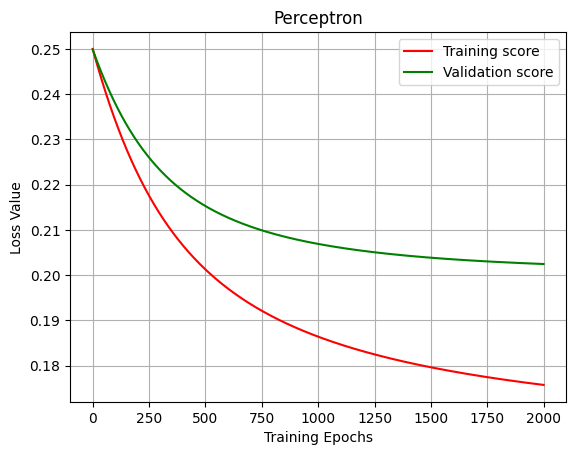

In [49]:
# Helper functions to make your life easier!
# Adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

from sklearn.metrics import roc_auc_score

def plot_learning_curve(train_scores,val_scores, title=None, ylim=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Epochs")
    plt.ylabel("Loss Value")
    plt.grid()
    plt.plot(range(len(train_scores)), train_scores, '-', color="r",
             label="Training score")
    plt.plot(range(len(val_scores)), val_scores, '-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    plt.show()

def mse_loss(y, p):
  return np.mean( (y-p)**2 )

def accuracy(y,p):
    y_hat = np.round(p)
    return float(len(np.where(y == y_hat)[0]))/len(y)

# Now the part you are supposed to complete!

lr = 0.01 # Find a good learning rate. 0 will not be good -> your perceptron won't learn anything
n_epochs = 2000 # Find a good number of epochs. 0 will not be good -> your perceptron won't learn anything

w = np.zeros((X_train.shape[1],))

w_new = w

train_scores = []
val_scores = []
for i in range(n_epochs):
    p = forward_pass(X_train, w_new) # Replace with your forward pass 
    gw0,gw1,gw2,gw3,gw4,gw5,gw6,gw7 = backward_pass(y, X_train, p) # Replace with your backward pass 
    w_new[0] = w_new[0] - lr*gw0 # Apply the gradient descent learning rule
    w_new[1] = w_new[1] - lr*gw1
    w_new[2] = w_new[2] - lr*gw2
    w_new[3] = w_new[3] - lr*gw3
    w_new[4] = w_new[4] - lr*gw4
    w_new[5] = w_new[5] - lr*gw5
    w_new[6] = w_new[6] - lr*gw6
    w_new[7] = w_new[7] - lr*gw7
    # Keep track of how well we are doing on train data
    train_scores.append(np.mean(mse_loss(y_train, p)))

    p_val = forward_pass(X_val, w_new) # Replace with your forward pass on *val* data

    # Keep track of how well we are doing on train data
    val_scores.append(np.mean(mse_loss(y_val, p_val)))

# Measure the performance of our perceptron after training
p = forward_pass(X_train, w_new) # Forward pass on training data
p_val =  forward_pass(X_val, w_new) # Forward pass on val data
    
print("-"*10 + " Training Set " + "-"*10)
print("MSE Loss: \t\t" + str(mse_loss(y_train,p)))
print("Accuracy: \t" + str(accuracy(y_train,p)))
print("AUC: \t\t" + str(roc_auc_score(y_train, p)))


print("-"*10 + "Validation Set" + "-"*10)
print("MSE Loss: \t\t" + str(mse_loss(y_val,p_val)))
print("Accuracy: \t" + str(accuracy(y_val,p_val)))
print("AUC: \t\t" + str(roc_auc_score(y_val,p_val)))

plot_learning_curve(train_scores,val_scores, title='Perceptron', ylim=None)


## Part 3: Perceptron with L2 regularization (20 points)
In this section, we will implement perceptron and backpropagation with L2 regularization from scratch, and apply them to the same dataset from Part 1 again.

Train your perceptron with L2 regularization using the `forward_pass` and `backward_pass` functions for 1,000 epochs. Report the loss, accuracy, AUC for both the training and validation data sets. Plot the training and validation loss vs. epochs. Modify this cell to include your results and commentary on your approach.

Recall from lecture that an L2 penalty augments the loss function with an additional regularization term that penalizes the nerual network for using *large* weights. For the purposes of this excercise, we will use the following form:

$$ \ell_{L2}(y_i, p_i) = (y_i - p_i)^2 + \lambda*\sum_{j=1}^2 w_j^2$$  

where $\lambda$ is a tuning parameter that you will have to select by trying a grid of possible values. Your task is to change the `backward_pass` function to incorporate this new regularization term. The forward pass should remain unchanged.

Please do **NOT** use Keras, Pytorch, Tensorflow, or any other high-level a framework. Upon completing this exercise from scratch, you will gain a deep understanding of what's under the hood of popular deep learning packages. **No loops are allowed.** Please use only matrix, vector, or element-wise operations.

**Hint**: This new term is additive. Think about what parts of the backward pass are the same as part 2, and what parts would be different from part 2.

Your first task to complet this new backward pass function:

In [50]:
# The new backward pass function. We now have to include lambda since (hint!) it will be 
# needed for the backward pass
# Fill in the 0 with your solution
def backward_pass_l2(y,X, p, w, lam):

    # Compute all of the element-wise terms at the sample level
    grad_w0 =  (p-y) * p * (1-p) * X[:, 0]+lam * (w[0]**2)
    grad_w1 =  (p-y) * p * (1-p) * X[:, 1]+lam * (w[1]**2)
    grad_w2 =  (p-y) * p * (1-p) * X[:, 2]+lam * (w[2]**2)
    grad_w3 =  (p-y) * p * (1-p) * X[:, 3]+lam * (w[3]**2)
    grad_w4 =  (p-y) * p * (1-p) * X[:, 4]+lam * (w[4]**2)
    grad_w5 =  (p-y) * p * (1-p) * X[:, 5]+lam * (w[5]**2)
    grad_w6 =  (p-y) * p * (1-p) * X[:, 6]+lam * (w[6]**2)
    grad_w7 =  (p-y) * p * (1-p) * X[:, 7]+lam * (w[7]**2)
    # Compute gradients for every example and average
    grad_w0 = grad_w0.mean()
    grad_w1 = grad_w1.mean()
    grad_w2 = grad_w2.mean()
    grad_w3 = grad_w3.mean()
    grad_w4 = grad_w4.mean()
    grad_w5 = grad_w5.mean()
    grad_w6 = grad_w6.mean()
    grad_w7 = grad_w7.mean()
    
    return grad_w0, grad_w1, grad_w2,grad_w3, grad_w4, grad_w5, grad_w6, grad_w7

Now we are going train our neural network with L2 regularization. Places with a `0` are places where you should fill in your solution

Current value of lambda: 0.5
Train loss: 0.238,     Val loss: 0.239

Current value of lambda: 0.55
Train loss: 0.238,     Val loss: 0.239

Current value of lambda: 0.6
Train loss: 0.238,     Val loss: 0.239

Current value of lambda: 0.65
Train loss: 0.238,     Val loss: 0.239

Current value of lambda: 0.7
Train loss: 0.238,     Val loss: 0.239

Current value of lambda: 0.75
Train loss: 0.238,     Val loss: 0.238

Current value of lambda: 0.8
Train loss: 0.238,     Val loss: 0.238

Current value of lambda: 0.85
Train loss: 0.238,     Val loss: 0.238

Current value of lambda: 0.9
Train loss: 0.238,     Val loss: 0.238

Current value of lambda: 0.95
Train loss: 0.238,     Val loss: 0.239

Current value of lambda: 1
Train loss: 0.238,     Val loss: 0.239


 Best value for lambda: 0.85
---------- Training Set ----------
Loss: 0.23780785315706301
Accuracy: 0.6123778501628665
AUC: 0.6192936824461013
---------- Validation Set ----------
Loss: 0.23847826055563454
Accuracy: 0.5844155844155844
AU

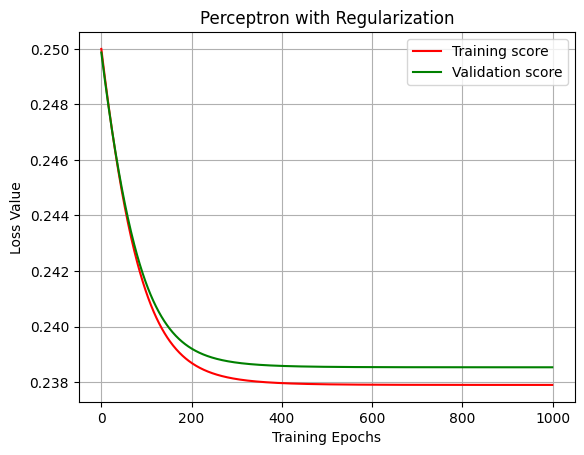

In [51]:
# We will sweep over a range of potential lambdas
lambda_seq = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1] # Replace this with a list of lambdas to try 

# We will set up some lists to track our progress
best_train_scores = []
best_val_scores = []
best_val_loss = 1e9
best_lambda = 0
w_best = np.zeros((X_train.shape[1],))

for current_lambda in lambda_seq:
    w = np.zeros((X_train.shape[1],))
    lr = 0.01 # Find a good learning rate. 0 will not be good -> your perceptron won't learn anything
    epochs = 1000  # Find a good number of epochs. 0 will not be good -> your perceptron won't learn anything
    w_new = w.copy()
    print(f'Current value of lambda: {current_lambda}')
    train_scores = []
    val_scores = []
    for i in range(epochs):
        p = forward_pass(X_train, w_new) # Your forward pass 
        gw0,gw1,gw2,gw3,gw4,gw5,gw6,gw7 = backward_pass_l2(y,X_train,p, w_new, current_lambda) # Your *new* backward pass with the L2 penalty
        w_new[0] = w_new[0] - lr*gw0 # gradient descent update rule
        w_new[0] = w_new[0] - lr*gw1
        w_new[0] = w_new[0] - lr*gw2
        w_new[0] = w_new[0] - lr*gw3
        w_new[0] = w_new[0] - lr*gw4
        w_new[0] = w_new[0] - lr*gw5
        w_new[0] = w_new[0] - lr*gw6
        w_new[0] = w_new[0] - lr*gw7
        # Let's measure some performance on the train data
        train_score = mse_loss(y_train, p)

        # Let's measure some performance on the val data
        p_val = forward_pass(X_val, w_new)
        val_score = mse_loss(y_val, p_val)

        # Log it so we can keep track of it so we can make some loss curves
        train_scores.append(train_score)
        val_scores.append(val_score)

    # Print out some info for this value of lambda
    p = forward_pass(X_train, w_new)
    p_val = forward_pass(X_val, w_new)
    current_train_loss = mse_loss(y_train, p)
    current_val_loss = mse_loss(y_val, p_val)
    print(f'Train loss: {np.round(current_train_loss, 3)}, \
    Val loss: {np.round(current_val_loss, 3)}\n')

    # Is this our best lambda?
    if current_val_loss < best_val_loss:
        best_val_loss = current_val_loss
        best_lambda = current_lambda
        best_train_scores = train_scores
        best_val_scores = val_scores
        w_best = w_new
        
p_train_best = forward_pass(X_train, w_best)
p_val_best = forward_pass(X_val, w_best)

print(f'\n Best value for lambda: {best_lambda}')

print("-"*10 + " Training Set " + "-"*10)
print(f'Loss: {mse_loss(y_train,p_train_best)}')
print(f'Accuracy: {accuracy(y_train, p_train_best)}')
print(f'AUC: {roc_auc_score(y_train, p_train_best)}')

print("-"*10 + " Validation Set " + "-"*10)
print(f'Loss: {mse_loss(y_val, p_val_best)}')
print(f'Accuracy: {accuracy(y_val,p_val_best)}')
print(f'AUC: {roc_auc_score(y_val,p_val_best)}')


plot_learning_curve(train_scores,val_scores, title='Perceptron with Regularization', ylim=None)

Comment on whether you think L2 regularization helped in this scenario, and justify your answer.


The regularization term did not help in terms of accuracy or AUC. But it is easy to see that a stable response of the loss value was achieved in less epochs and the model seems to have quite similar results for the training and the validation data set, which is useful when looking for a robust or efficient model.


## Part 4: Multi-layer neural network using Keras (30 points)
In this section, we will train a multi-layer neural network using the Keras framework, and apply it to the dataset from Part 1.

### Question 4.1 Train a multi-layer neural network using Keras (20 points)
Please implement a neural network with at least one hidden layer using Keras, and plot the model accuracy and model loss in both the training and validation sets over the epochs.

Your neural network should have an accuracy > 0.7 when evaluated by the validation data set. 

**For the purposes of this homework continue to use MSE loss for comparison to the previous question. In real life (i.e. not homeworks, you would want to use binary cross entropy since this is a classification problem.**

In [52]:
########## Answer ##########
# Train a multi-layer neural network using Keras

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import Dense, Dropout, Activation


# Your code here - build an MLP with one hidden layer
############################################################


N_EPOCHS = 200 # Decide how long to train the network
BATCH_SIZE = 10 # Decide on the batch size (less important for this problem)


In [60]:
## Define the model
model = Sequential()

## Your model specification goes below

num_features = X_train.shape[1]
model.add(Dense(units=30, activation='tanh', input_dim=num_features, name='hidden_layer'))
model.add(Dropout(rate=0.1))
model.add(Dense(units=1, activation='sigmoid', name='output_layer')) 


## After you have specified the model, compile it with an appropriate loss function and optimizer

opt = SGD(learning_rate=0.025)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
## Now fit the model with a call to model.fit()
history=model.fit(x=X_train, 
         y=y_train,
         batch_size=BATCH_SIZE,
         validation_data = (X_val, y_val),
         epochs=N_EPOCHS)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 30)                270       
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 output_layer (Dense)        (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
62/62 [==============================] - 1s 6ms/step - loss: 0.6031 - accuracy: 0.6710 - val_loss: 0.5487 - val_accuracy: 0.7273
Epoch 2/200
62/62 [==============================] - 0s 4ms/step - loss: 0.5057 - accuracy: 0.7655 - val_loss: 0.5215 - val_accuracy: 0.7338
Epoch 3/200
62/62 [===================

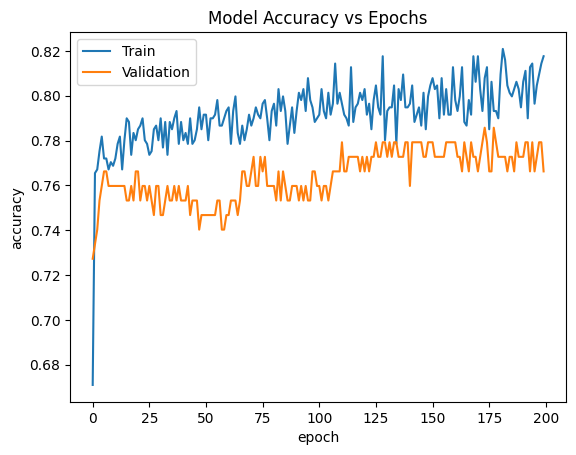

In [61]:
# Make a plot of model accuracy vs. epochs 
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


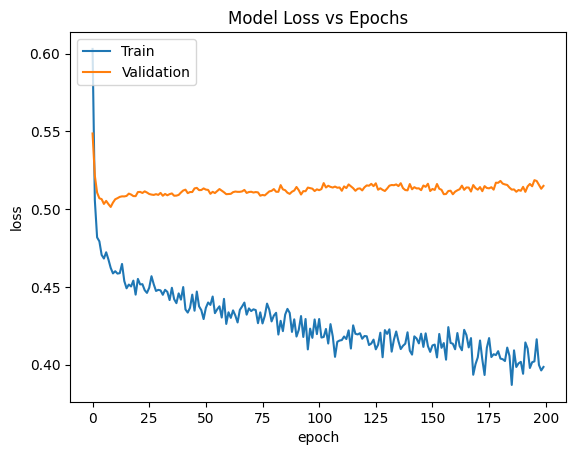

In [62]:
# Plot model loss vs epochs
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [64]:
# Print final accuracy
model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 3ms/step - loss: 0.5150 - accuracy: 0.7662


[0.514979898929596, 0.7662337422370911]

### Question 4.2. Build a logistic regression model using the training set, and evaluate the training and validation set accuracy of the resulting model. (5 points)
Feel free to use any pre-built functions for logistic regression.

Hint: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

In [59]:
## Your code for fitting a logistic regression model 
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
import matplotlib 
# fit the logistic regression model
# note that only the training data X_train and y_train should be used in the training process
clf_lr = LogisticRegression(random_state=0, solver='newton-cholesky').fit(X_train, y_train)
print('\nPrediction Probability')
y_predicted = clf_lr.predict(X_val)
predicted_lr = clf_lr.predict_proba(X_val)
print("[ Min P(x,y): %.4f - " % predicted_lr.min(),"Max P(x,y): %.4f - " % predicted_lr.max(), "Mean P(x,y): %.4f ]" % predicted_lr.mean())
print('\nConfusion Matrix')
print(confusion_matrix(y_val,y_predicted))
tn, fp, fn, tp = confusion_matrix(y_val,y_predicted).ravel()
print(tn, fp, fn, tp)
print('\nBetas & Intercept')
print(clf_lr.coef_)
print(clf_lr.intercept_)
print('\nScore')
clf_lr.score(X_val, y_val)




Prediction Probability
[ Min P(x,y): 0.0240 -  Max P(x,y): 0.9760 -  Mean P(x,y): 0.5000 ]

Confusion Matrix
[[87 18]
 [19 30]]
87 18 19 30

Betas & Intercept
[[ 0.4677367   1.1779494  -0.16731434 -0.01827802 -0.02310288  0.75387507
   0.26463004  0.13983838]]
[-0.83129246]

Score


0.7597402597402597

### Question 4.3. Does your multi-layer neural network perform better than the logistic regression model? Why or why not (name three reasons)? (5 points)
Word limit: 200 words.


**Your answer:** 
The average or maximum accuracy given by the score is almost the same for both models. In this case, the multi-layer NN was slightly better, and may have variations if re-trained. Nevertheless, he regression has a mean value of prediction probability of 0.5 for the validation data set. The results of the confusion matrix tell us that 18 false positives and 19 false negatives were delivered, which implies that the regression might have given 19 false alarms and sadly delayed the treatment for 18 patients, if it were the case that these data had been used for clinical purposes. Yet, as it was demonstrated by this work, it is way more easy to change the architecture of the multi-layer NN so it can perform better and achive better results subsequently, or even making it possible to compute a multivariate analysis more efficiently, if required.   